In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import os
import sys
import time

import numpy as np
from six.moves import range
import tensorflow as tf

from google.protobuf import text_format
from tensorflow.python.platform import app
from delf import delf_config_pb2
from delf import feature_io
from delf import utils
from delf import extractor

import delf as df

import sys
import os.path as path

modulos_path = path.abspath('../minIA')
if modulos_path not in sys.path:
    sys.path.append(modulos_path)

from utiles import lectura_img
import numpy as np

import pickle
import cv2 as cv
import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

https://github.com/tensorflow/models/blob/master/research/delf/delf/python/examples/extract_features.py

## Definición de extractor

In [98]:
# Pace to report extraction log.
_STATUS_CHECK_ITERATIONS = 1000

def extractorDELF(image_dir, config_path, output_dir, name_pickle):
    
  # Read list of images.
    print('Reading list of images...')
    image_paths = lectura_img(image_dir)
    num_images = len(image_paths)
    print(f'Done! Found {num_images} images')

  # Parse DelfConfig proto.
    config = delf_config_pb2.DelfConfig()
    with tf.io.gfile.GFile(config_path, 'r') as f:
        text_format.Merge(f.read(), config)

  # Create output directory if necessary.
    if not tf.io.gfile.exists(output_dir):
        tf.io.gfile.makedirs(output_dir)
    
  #Create pickle file
    path_pickle = path.abspath(output_dir+'//'+name_pickle)
    pickle_file = open(path_pickle, 'wb')

  #Create lista de descriptor por imagen
    descriptors = list()
    
  #Crea el extractor
    extractor_fn = extractor.MakeExtractor(config)

    start = time.time()
    for i in range(num_images):
    # Report progress once in a while.
        if i == 0:
            print('Starting to extract DELF features from images...')
        elif i % _STATUS_CHECK_ITERATIONS == 0:
            elapsed = (time.time() - start)
            print(
                f'Processing image {i} out of {num_images}, last '
                f'{_STATUS_CHECK_ITERATIONS} images took {elapsed} seconds'
            )
            start = time.time()
            
      #Carga las imágenes
        im = np.array(utils.RgbLoader(image_paths[i]))

      # Extract features.
        extracted_features = extractor_fn(im)
        
      # Save features.
        nom_img = path.split(image_paths[i])[1]
        #extracted_features['local_features']['name_img'] = nom_img #Comentar al hacer la extracción
        descp_img = extracted_features['local_features']
        descp = descp_img['locations']
        kp = np.concatenate((descp_img['locations'],descp_img['scales'].reshape(-1,1)), axis=1)
        img = {'keypoints': kp, 'descriptors':descp, 'name_img':nom_img}
        #descriptors.append(extracted_features['local_features']) #Comentar al hacer la extracción
        descriptors.append(img) #Comentar si se desea visualizar
    pickle.dump("Ver configuración en: " + config_path, pickle_file)
    pickle.dump(descriptors, pickle_file)
    print("Terminó\nArchivo Generado")
    #return descriptors #Descomentar para vizualización

In [89]:
# Pace to report extraction log.
_STATUS_CHECK_ITERATIONS = 10

def VisualizadorDELF(image_dir, config_path, output_dir, name_pickle):
    
  # Read list of images.
    print('Reading list of images...')
    image_paths = lectura_img(image_dir)
    num_images = len(image_paths)
    print(f'Done! Found {num_images} images')

  # Parse DelfConfig proto.
    config = delf_config_pb2.DelfConfig()
    with tf.io.gfile.GFile(config_path, 'r') as f:
        text_format.Merge(f.read(), config)

  # Create output directory if necessary.
    if not tf.io.gfile.exists(output_dir):
        tf.io.gfile.makedirs(output_dir)

  #Create lista de descriptor por imagen
    descriptors = list()
    
  #Crea el extractor
    extractor_fn = extractor.MakeExtractor(config)

    start = time.time()
    for i in range(num_images):
    # Report progress once in a while.
        if i == 0:
            print('Starting to extract DELF features from images...')
        elif i % _STATUS_CHECK_ITERATIONS == 0:
            elapsed = (time.time() - start)
            print(
                f'Processing image {i} out of {num_images}, last '
                f'{_STATUS_CHECK_ITERATIONS} images took {elapsed} seconds'
            )
            start = time.time()
            
      #Carga las imágenes
        im = np.array(utils.RgbLoader(image_paths[i]))

      # Extract features.
        extracted_features = extractor_fn(im)
        
      # Save features.
        nom_img = path.split(image_paths[i])[1]
        extracted_features['local_features']['name_img'] = nom_img #Comentar al hacer la extracción
        descriptors.append(extracted_features['local_features']) #Comentar al hacer la extracción
    print("Terminó")
    return descriptors #Descomentar para vizualización

In [99]:
#Output incluye el nombre del archivo
image_dir = '/media/working/minia/images/images_training_rev1/'
config_path_galaxy = '/media/working/minia/DELF/models/research/delf/delf/python/training/delf_config_galaxy_2100.pbtxt'
output_dir = '/media/working/minia/DELF/output/'
name_pickle = 'DELF_galaxy_full.pickle'
#descrip = VisualizadorDELF(image_dir, config_path_galaxy, output_dir, name_pickle)
extractorDELF(image_dir, config_path_galaxy, output_dir, name_pickle)

Reading list of images...
Done! Found 61578 images
Starting to extract DELF features from images...
Processing image 1000 out of 61578, last 1000 images took 100.79374575614929 seconds
Processing image 2000 out of 61578, last 1000 images took 98.76800680160522 seconds
Processing image 3000 out of 61578, last 1000 images took 98.77857947349548 seconds
Processing image 4000 out of 61578, last 1000 images took 99.41029286384583 seconds
Processing image 5000 out of 61578, last 1000 images took 99.07668709754944 seconds
Processing image 6000 out of 61578, last 1000 images took 98.78534531593323 seconds
Processing image 7000 out of 61578, last 1000 images took 99.32468175888062 seconds
Processing image 8000 out of 61578, last 1000 images took 99.14921069145203 seconds
Processing image 9000 out of 61578, last 1000 images took 98.79901218414307 seconds
Processing image 10000 out of 61578, last 1000 images took 98.82456135749817 seconds
Processing image 11000 out of 61578, last 1000 images took

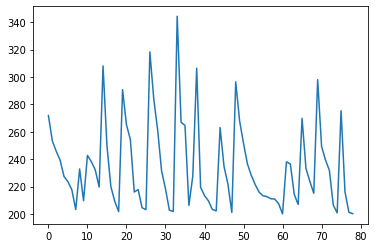

In [91]:
descrip_200 = descrip[:]
attn = [score for kp in descrip_200[:] for score in kp['attention']]
import matplotlib.pyplot as plt
plt.plot(attn)

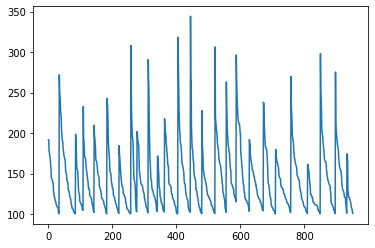

In [94]:
descrip_100= descrip[:]
attn = [score for kp in descrip_100[:] for score in kp['attention']]
import matplotlib.pyplot as plt
plt.plot(attn)

### Rutas de búsqueda de imágenes

In [10]:
descr_0 = descrip[9]
#print("Nombre la de imagen:",descr_0['name_img'])
print("Número de coordenadas (uno por cada Key Point):", len(descr_0['locations']))
print("Número de tamaños (uno por cada Key Point):",len(descr_0['scales']))
print("Número de descriptores en la imagen (uno por cada Key Point):", len(descr_0['descriptors']))
print("Número de puntuaciones (uno por cada Key Point):",len(descr_0['attention']))

print("\n\nDatos para el KP i")
i=3
print("Coordenadas: ", descr_0['locations'][i])
print("Tamaño: ",descr_0['scales'][i])
print("Descriptor: ", descr_0['descriptors'][i])
print("Puntuacion: ", descr_0['attention'][i])

print("Tamaño min: ",min(descr_0['scales']), "Tamaño max: ", max(descr_0['scales']))



print(type(descr_0['locations'][i]))

Nombre la de imagen: 977000.jpg
Número de coordenadas (uno por cada Key Point): 6
Número de tamaños (uno por cada Key Point): 6
Número de descriptores en la imagen (uno por cada Key Point): 6
Número de puntuaciones (uno por cada Key Point): 6


Datos para el KP i
Coordenadas:  [192. 192.]
Tamaño:  1.0
Descriptor:  [-0.09071543  0.11191425 -0.09092399 -0.01801112 -0.02836732 -0.0922437
 -0.2429012   0.01345882  0.03821358  0.02805151  0.05817662  0.10565305
 -0.05766803  0.02895285 -0.00902522  0.04715138 -0.02595872 -0.08408737
  0.01318113  0.13445878 -0.14015599 -0.02717575  0.05140787 -0.046005
  0.0763531  -0.11832844 -0.06552954 -0.05509731 -0.04846295  0.00933114
 -0.09748781  0.03400456 -0.02100862 -0.02302373 -0.08024744 -0.19740486
  0.16359432  0.00152265  0.1008741   0.01104816 -0.00057432 -0.03318101
  0.18974395 -0.06363465 -0.04468843 -0.01442856 -0.00703476 -0.04011876
 -0.12324115  0.14153093 -0.05740742 -0.00657834  0.1523353  -0.07762676
  0.04615701  0.01747986 -0.08

In [74]:
#kp = list(descr_0['locations'][1])+ float(descr_0['scales'])
#np.concatenate((descr_0['locations'][1],np.array(descr_0['scales'][1]).reshape(-1)))
l = descr_0['locations']
s = descr_0['scales'].reshape(-1,1)
print(l, l.shape)
print(s, s.shape)
kp = np.concatenate((l,s), axis=1)
a

[[192.      192.     ]
 [180.99548 180.99548]
 [181.02107 181.02107]
 [192.      192.     ]
 [224.      192.     ]
 [203.64871 203.64871]] (6, 2)
[[2.        ]
 [2.8280544 ]
 [1.4142271 ]
 [1.        ]
 [1.        ]
 [0.70711356]] (6, 1)


array([[192.        , 192.        ,   2.        ],
       [180.99548   , 180.99548   ,   2.8280544 ],
       [181.02107   , 181.02107   ,   1.4142271 ],
       [192.        , 192.        ,   1.        ],
       [224.        , 192.        ,   1.        ],
       [203.64871   , 203.64871   ,   0.70711356]], dtype=float32)

In [ ]:

name = descp_img['name_img']
descp = descp_img['locations']
kp = np.concatenate((descp_img['locations'],descp_img['scales'].reshape(-1,1)), axis=1)
img = {'keypoints': kp, 'descriptors':descp, 'name_img':name}

### Creación de puntos de interés

In [4]:

#Recibe lista de keypoints de una imagen
def genKeyPoints( kp_img ):
    keypoints = list()
    for i in range (len(kp_img['locations'])):
        keypoints.append(cv.KeyPoint(kp_img['locations'][i][1], kp_img['locations'][i][0], 5*kp_img['scales'][i]))
    return keypoints

In [95]:
@interact
def show_images_per_descriptors(image = [ i for i in range (len(descrip))]):
    descr = descrip[image]
    imagen = path.abspath(image_dir+'/'+descr['name_img'])
    print(imagen)
    img = cv.imread(imagen)
    gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    keypoints = genKeyPoints(descr) 
    img=cv.drawKeypoints(img,keypoints,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) #Aqui no quitar
    cv.imwrite(output_dir+'\\'+descr['name_img'],img)

    plt.figure(figsize=(20,8))
    plt.imshow(img)

interactive(children=(Dropdown(description='image', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,…

In [ ]:
descp_x_image = list()
nom_img = path.split(imagen)[1]
    descs_img = extractor.calculoDescriptores(img)
    descs_img['name_img'] = ['name_img']
    descriptores.append(descs_img)
